In [88]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
#Loading the dataset
df=pd.read_csv("heartdisease_data.csv")
df

,Age,Sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [90]:
#Checking the shape 
df.shape

(200, 14)

In this dataset there are 200 rows and 14 columns are present.

In [91]:
#Checking the datatypes of the columns
df.dtypes

Age          int64
Sex          int64
Cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [92]:
#Replace Question mark(?) values with nan values
df.replace("?", np.nan, inplace = True)
df.isnull().sum()

Age           0
Sex           0
Cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [93]:
#As thal and ca has maximum null values , we can drop the columns directly

df.drop(["thal","ca"],inplace=True,axis=1)
df

,Age,Sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,0


In [94]:
#Renaming a num column to target
df=df.rename(columns={"num": "target"})

In [95]:
#To have a better analysis creating a new variable Target where num(0)=0 for no heart disease and num(1,2,3,4)=1 for heart disease
 
df['target'].replace([2,3,4], 1,inplace=True)
df['target'].unique()

array([1, 0], dtype=int64)

In [96]:
#Converting datatypes to float format for easy EDA analysis
df=df.astype(dtype=float)

In [97]:
#Imputing columns and replacing with mean values
col_imp=["trestbps","chol",'thalach',"oldpeak"]

for i in col_imp:
    df[i].fillna(df[i].mean(), inplace = True)
    
df.isnull().sum()

Age           0
Sex           0
Cp            0
trestbps      0
chol          0
fbs           7
restecg       0
thalach       0
exang        53
oldpeak       0
slope       102
target        0
dtype: int64

Observation:
    
    1.After imputing,except fbs,exang and slope has left with missing values rest all have no missing values.

In [98]:
#As only 7 values are missing in fbs , we will replace it with most common value

df["fbs"].fillna(df["fbs"].median(), inplace = True)

In [99]:
#data for exang and slopes depend on oldpeak, so we will first understand the data
for col in ["exang","slope"]:
    print("Unique values in ",col, " : ", df[col].unique())
    print(df.groupby(col)["oldpeak"].median())

Unique values in  exang  :  [ 1.  0. nan]
exang
0.0    0.5
1.0    1.5
Name: oldpeak, dtype: float64
Unique values in  slope  :  [ 2. nan  3.  1.]
slope
1.0    1.5
2.0    1.5
3.0    2.0
Name: oldpeak, dtype: float64


In [100]:
#for exang we grouped and replaced values as per oldpeak median values.
for i in range(0,len(df["exang"])):
    if df["exang"][i]!=float:
        if df["oldpeak"][i] < 1:
            df["exang"][i] =0
        else:
            df["exang"][i] =1


In [101]:
#for slope we grouped and replaced values as per oldpeak median values.
for i in range(0,len(df["slope"])):
    if df["slope"][i]!=float:
        if df["oldpeak"][i] < 1.5:
            df["slope"][i] =1
        else:
            if df["oldpeak"][i] < 2 :
                df["slope"][i] = 2
            else :
                df["slope"][i] = 3

In [102]:
#Again checking null values
df.isnull().sum()

Age         0
Sex         0
Cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

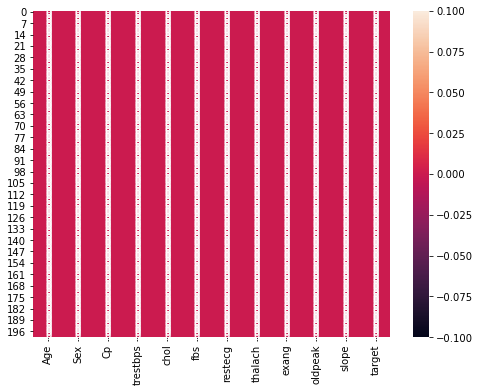

In [103]:
#Seeing the null values with the help of heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),annot=True)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()

Observation:

1. From this visualisation we can clearly see that there is no missing values present in our dataset.

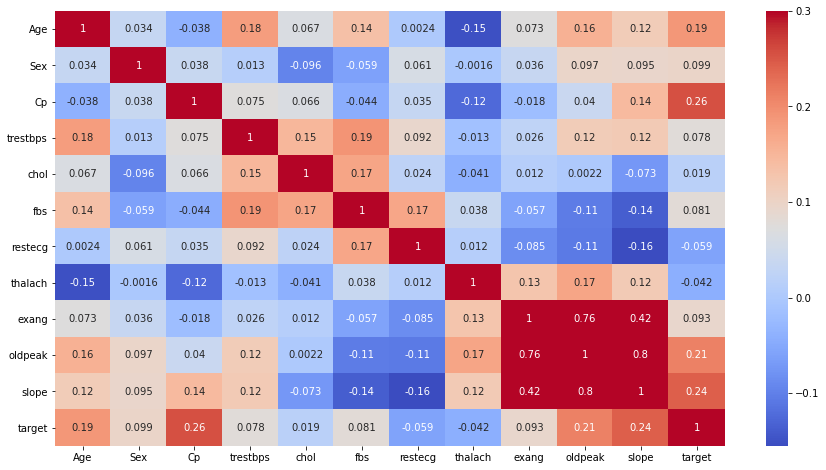

In [104]:
#Checking Correlation using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",vmax=0.3)


Here we can see the correlation between Age , cp, exang ,oldpeak , slope columns are highly positively correlated with target.

# Data Visualisation

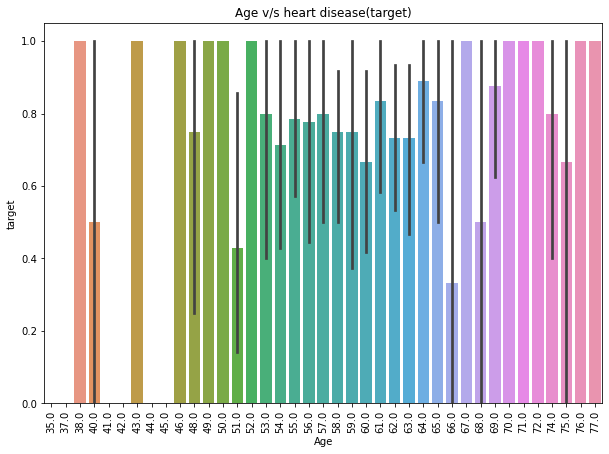

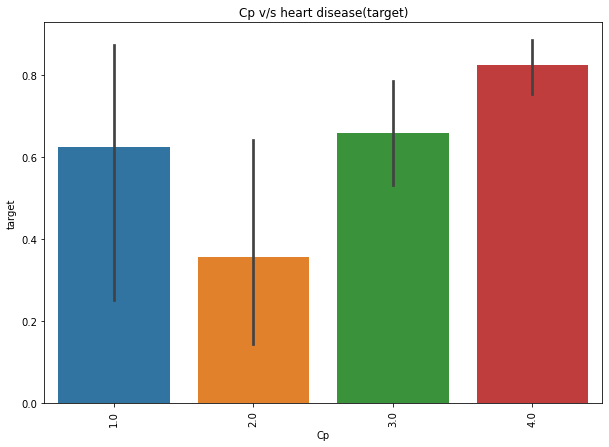

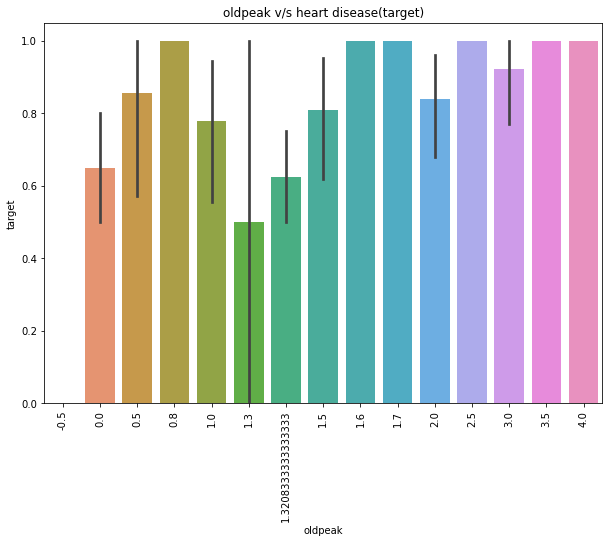

In [105]:
graphs = ["Age", "Cp",'oldpeak' ]
for x in graphs:
    plt.figure(figsize=(10,7))
    sns.barplot(x=df[x],y=df['target'])
    plt.xticks(rotation=90)
    plt.ylabel('target')
    plt.xlabel(x)
    plt.title(x+' v/s heart disease(target)')
    plt.show()
#after 50 age heart disease(target) increase.

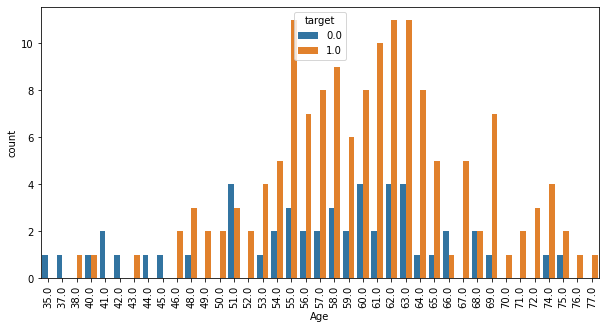

In [106]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=90)
sns.countplot(x='Age',hue='target',data=df)
plt.show()


Observation:
    1. At the age from 55 years to 64 years there are much chances of having heart disease.

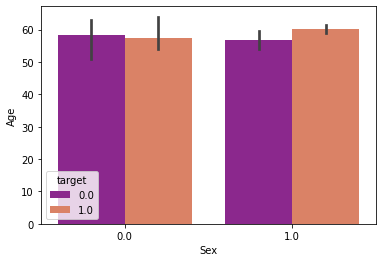

In [107]:
sns.barplot(x="Sex",y='Age',hue='target',data=df,palette='plasma')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025504151370>,
      dtype=object)

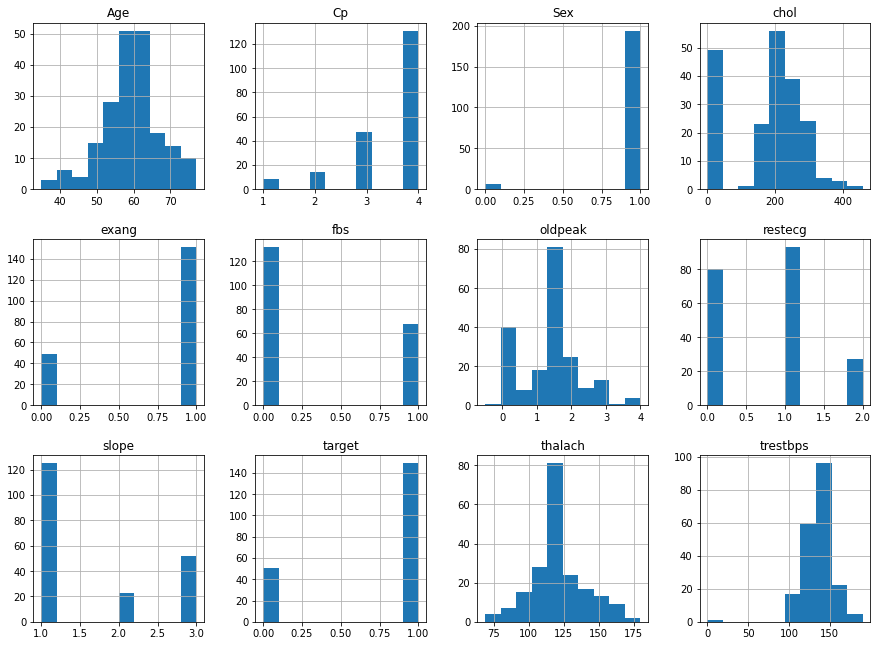

In [108]:
#Now plotting histogram for univariate analysis
df.hist(figsize=(15,15), layout=(4,4))

Observation:
    1. All the continous series data are normally distributed.

# Statistical Summary

In [109]:
#Checking the information of the dataset 
df.describe()

,Age,Sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.755000,1.320833,1.635000,0.745000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.431166,0.937755,0.869225,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,1.000000,1.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,1.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,1.000000


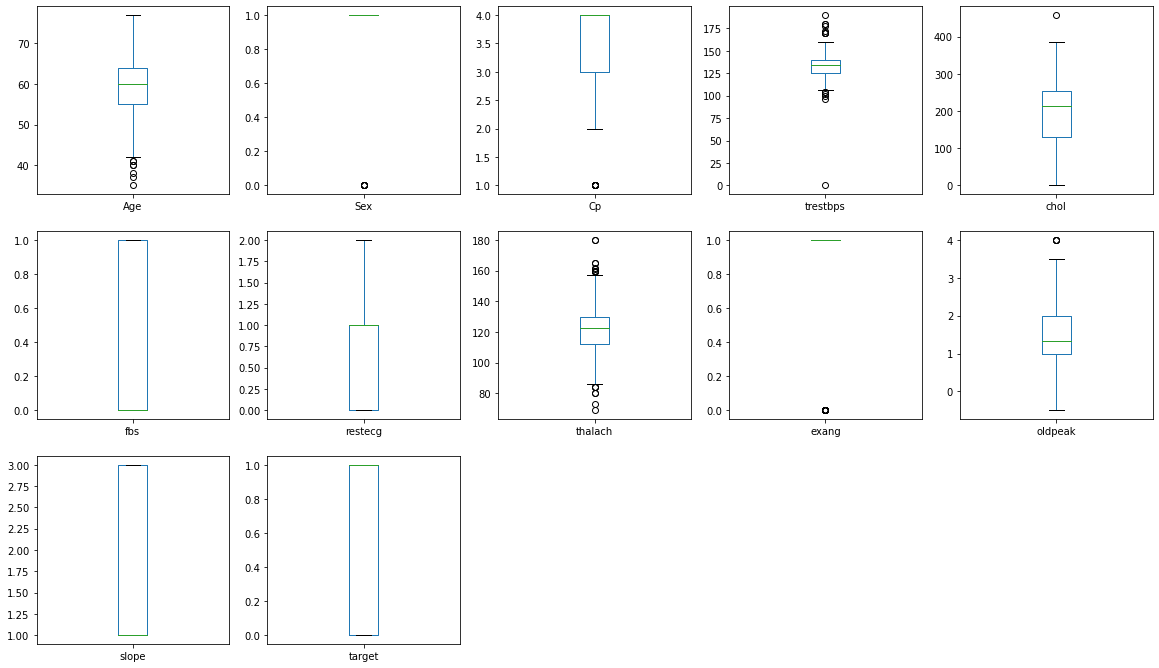

In [110]:
#box and whiskers plot for outliers
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))
plt.show()

Observation:
    1. Here we see that in Age,Cp,trestbps and thalach plots are having outliers. 

# Removing Outliers

In [111]:
#as there are lot of outliers in the data we will use z score analysis
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.79511750e+00, 1.57430441e+00, 5.85048613e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.41204031e+00, 7.32368718e-01, 1.70925967e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        1.91538592e-01, 4.20967846e-01, 5.85048613e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.41204031e+00, 7.32368718e-01, 5.85048613e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        2.37377363e-16, 7.32368718e-01, 1.70925967e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        1.41204031e+00, 7.32368718e-01, 5.85048613e-01]])

In [112]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(200, 12)


In [113]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.0,3.000000,3.0,1.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.0,0.000000,1.0,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.0,1.500000,2.0,1.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.0,2.500000,3.0,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.0,1.300000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62.0,1.0,4.0,158.000000,170.0,0.0,1.0,138.000000,0.0,0.000000,1.0,1.0
194,46.0,1.0,4.0,134.000000,310.0,0.0,0.0,126.000000,0.0,0.000000,1.0,1.0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.0,0.000000,1.0,1.0
198,58.0,1.0,4.0,133.763889,385.0,1.0,2.0,122.795918,1.0,1.320833,1.0,0.0


In [114]:
print(df.shape, '\t' , df_new.shape)

(200, 12) 	 (181, 12)


In [115]:
df=df_new
print(df.shape)

(181, 12)


In [116]:
collist=df.columns.values
ncol=12
nrow=10

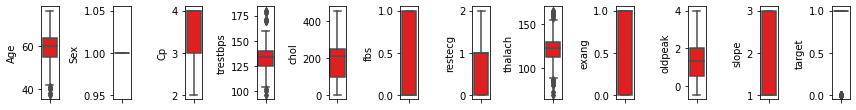

In [117]:
plt.figure(figsize=(12,15))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [118]:
#age , tresbps, thalach mean value
mean=['Age','trestbps','thalach']
for i in mean:
    df_mean = df[i].mean()
    print('Mean of', i ,'is:', df_mean)

Mean of Age is: 59.430939226519335
Mean of trestbps is: 134.44858809085343
Mean of thalach is: 121.67076333295753


In [119]:
#now finding the mean value of each column and replacing with outlier value
df.loc[df['Age']<45,'Age'] = np.mean(df['Age'])
df.loc[df['trestbps']<100,'trestbps'] = np.mean(df['trestbps'])
df.loc[df['trestbps']>150,'trestbps'] = np.mean(df['trestbps'])
df.loc[df['thalach']>130,'thalach'] = np.mean(df['thalach'])
df.loc[df['thalach']<110,'thalach'] = np.mean(df['thalach'])

Age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Sex         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Cp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trestbps    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs            AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalach      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exang       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slope          AxesSubplot(0.125,0.437414;0.133621x0.130172)
target      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

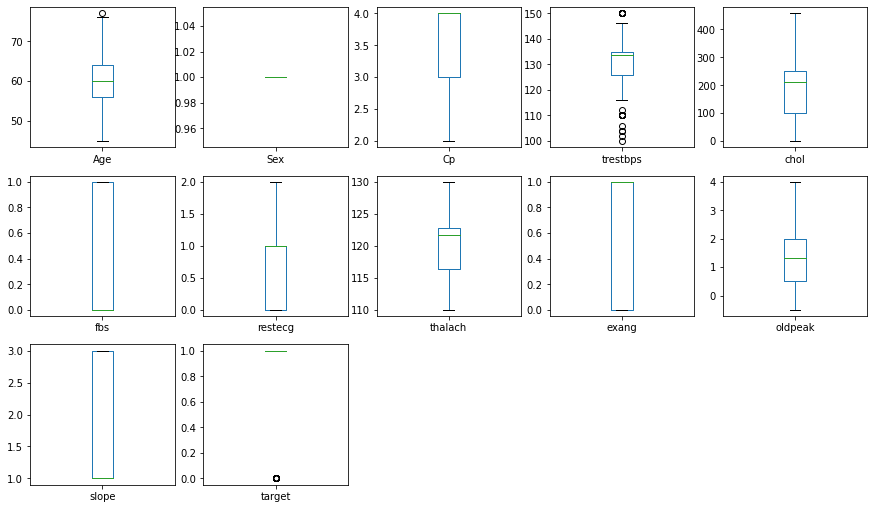

In [120]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Observation:
    1. Outliers are removed from Age,Cp and thalach.

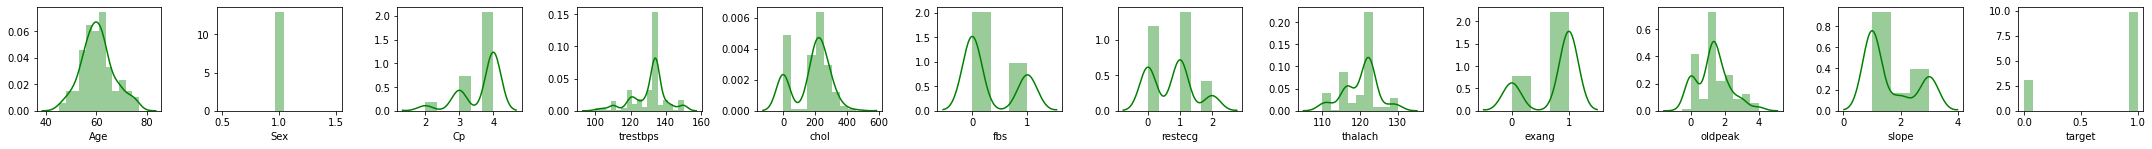

In [121]:
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Observation:
    
    1. From above visualisation all continous series are normally distributed .Therefore here no data is skewed.

In [122]:
#dropping target variable from X as it has to be predicted.
#assign the value of y for training and testing phase
xc = df.drop(columns=['target'])
yc = df[['target']]
#First using Average price as the target variable


In [123]:
#importing classifier model libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV


In [131]:
#Standardizing value of x by using standardscalar to make the data normally distributed
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc = StandardScaler()
col_to_scale = ["Age","trestbps","chol","thalach"]
xc[col_to_scale]=sc.fit_transform(xc[col_to_scale])
df_xc = pd.DataFrame(xc)
df_xc

,Age,Sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.411708,1.0,4.0,0.954202,0.736579,0.0,1.0,-1.849307,1.0,3.000000,3.0
1,-0.145725,1.0,4.0,-0.069468,0.281095,0.0,1.0,1.503928,0.0,0.000000,1.0
2,-0.056847,1.0,4.0,0.135266,0.361475,0.0,1.0,0.312582,1.0,1.500000,2.0
3,-0.837771,1.0,4.0,1.158936,0.450785,0.0,1.0,0.312582,1.0,2.500000,3.0
4,0.880263,1.0,3.0,-2.116808,0.316819,1.0,2.0,-0.877835,1.0,1.300000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
193,0.255523,1.0,4.0,0.407666,-0.067216,0.0,1.0,0.312582,0.0,0.000000,1.0
194,-2.243436,1.0,4.0,0.340000,1.183132,0.0,0.0,1.280379,0.0,0.000000,1.0
197,-0.837771,1.0,4.0,-0.888404,0.406130,1.0,1.0,-0.877835,0.0,0.000000,1.0
198,-0.369216,1.0,4.0,0.315830,1.852961,1.0,2.0,0.564110,1.0,1.320833,1.0


In [133]:
from sklearn.metrics import f1_score
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.2,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = f1_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="f1").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="f1").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="f1")
    print("Results for model : ",names,'\n',
          "max accuracy score correspond to random state " ,final_state , "is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print('*'*100)

In [134]:
#Now by using multiple Algorithms we are calculating the best model which suit best for our data set 
F1,accuracy,STD,MEAN,CV,models,NAME = [],[],[],[],[],[],[]
cross_val,std_dev,mean_acc,accuracy_scr_max = 0,0,0,0

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)   
   

Results for model :  Logistic Regression 
 max accuracy score correspond to random state  93 is 0.9180327868852458 
 Mean accuracy score is :  0.8654240152646733 
 Std deviation score is :  0.029924089843096507 
 Cross validation scores are :   [0.875      0.88888889 0.87096774 0.8852459  0.80701754]
****************************************************************************************************
Results for model :  Random Forest 
 max accuracy score correspond to random state  64 is 0.8852459016393442 
 Mean accuracy score is :  0.8529651733776535 
 Std deviation score is :  0.04965287618400196 
 Cross validation scores are :   [0.8852459  0.90322581 0.83333333 0.86666667 0.76363636]
****************************************************************************************************
Results for model :  SVM 
 max accuracy score correspond to random state  42 is 0.8615384615384616 
 Mean accuracy score is :  0.8651648351648351 
 Std deviation score is :  0.00818920976795669 
 Cross

Observation:
    
    1.From initial model values Logistic Regression and RandomForest Classifier are performing better than others.
    2. We will now estimate best parameters for them individually.

In [136]:
#Estimating parameters of Logisgic Regression for best fit
log_rg=LogisticRegression()
parameters={"C":[0.001,0.01,0.1,1,10] }
clf = GridSearchCV(log_rg, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
best_lr = clf.best_estimator_
coefs = best_lr.coef_
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)
print("Selected Features : ",format( np.count_nonzero(coefs)))
print("Existing features : ", format(coefs.size))

Best parameter :  {'C': 0.001} 
Best Estimator :  LogisticRegression(C=0.001) 
Best Score :  1.0
Selected Features :  11
Existing features :  11


In [137]:
log_rg=LogisticRegression(C=0.001)
max_acc_score("Logistic Regression" ,log_rg,df_xc,yc)

Results for model :  Logistic Regression 
 max accuracy score correspond to random state  42 is 0.8615384615384616 
 Mean accuracy score is :  0.8651648351648351 
 Std deviation score is :  0.00818920976795669 
 Cross validation scores are :   [0.86153846 0.875      0.875      0.85714286 0.85714286]
****************************************************************************************************


In [138]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier() 
Best Score :  0.7623123123123123


In [139]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100)
max_acc_score("RandomForest Classifier",rf_clf,df_xc,yc)

Results for model :  RandomForest Classifier 
 max accuracy score correspond to random state  68 is 0.888888888888889 
 Mean accuracy score is :  0.851121351766513 
 Std deviation score is :  0.05019632870520939 
 Cross validation scores are :   [0.86666667 0.90322581 0.85245902 0.86666667 0.76363636]
****************************************************************************************************


Observation:
    1. Logistic Regression is performing best as accuracy score  is closest to 1  and Standard Deviation is closest to 0.

In [140]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,test_size=0.2,stratify=yc)
log_rg.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

accuracy score is :  0.8918918918918919
classification report 
               precision    recall  f1-score   support

         0.0       1.00      0.56      0.71         9
         1.0       0.88      1.00      0.93        28

    accuracy                           0.89        37
   macro avg       0.94      0.78      0.82        37
weighted avg       0.91      0.89      0.88        37



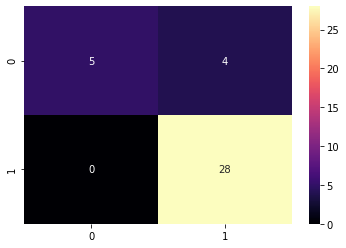

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

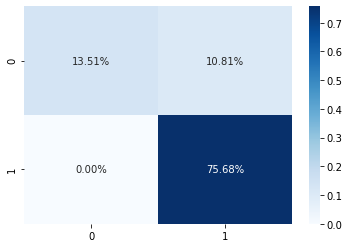

In [142]:
sns.heatmap(cnf/np.sum(cnf), annot=True, 
            fmt='.2%', cmap='Blues')

Observation:
    1. As per confusion matrix  with True and actual value is 90% accurate .

In [144]:
pred_pb=log_rg.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)

# AUC_ROC Curve

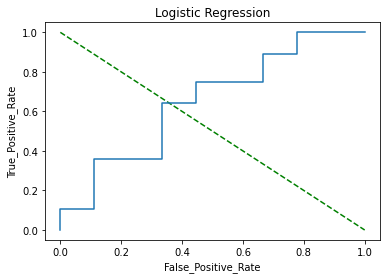

In [145]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Logistic Regression")
plt.show()

Logistic Regression  is working well because it gives the best accuracy score as compared to other models.

So we save Logistic Regression as our final Model.

# Saving Final Model

In [146]:
import joblib
#save the model as a pickle in a file 
joblib.dump(log_rg,'log_rg_heartdisease.pkl')

['log_rg_heartdisease.pkl']